# Linear Regression

$$ \hat{y} = \hat{\theta}_{0} + \hat{\theta}_{1}x_{1} + ... + \hat{\theta}_{n}x_{n}$$

Or the vectorized form:

$$ \hat{y} = h_{\theta}(x) = \theta^{T}x$$

where:

$\theta$ is the parameter vector.

$x$ is the instance's feature vector.

$h_{\theta}$ is the hypothesis function.


We want to select (fit) the parameters $\theta$ so that the model best fits the training set.

## Least Squares Regression

The most common performance measure of a regression model is the Root Mean Square Error (RMSE). Therefore, to train a Linear Regression model, you need to find the value of $\theta$ that minimizes the RMSE. In practice, it is simpler to minimize the Mean Square Error (MSE) than the RMSE, and it leads to the same result (because the value that minimizes a function also minimizes its square root).

$$RMSE = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})- y^{(i)})^{2}}$$

$$MSE = \frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})- y^{(i)})^{2}$$

For the linear regression model:

$$J(\theta) = MSE = \frac{1}{m}\sum_{i=1}^{m}(\theta^{T}x^{(i)}- y^{(i)})^{2}$$

### The Normal Equation

$$\hat{\theta} = (X^{T}X)^{-1}X^{T}y$$

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

X = np.random.randn(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.figure(figsize=(16, 9))
plt.scatter(X, y);

In [3]:
X_aug = np.concatenate((np.ones((100, 1)), X), axis=1)
theta = np.linalg.inv(X_aug.T @ X_aug) @ X_aug.T @ y

print("Estimated Coefficients: \n{}".format(theta))
print(theta)

Estimated Coefficients: 
[[4.06904297]
 [3.1220993 ]]
[[4.06904297]
 [3.1220993 ]]


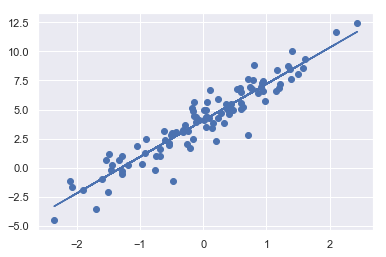

In [4]:
y_pred = X_aug @ theta
plt.scatter(X, y)
plt.plot(X, y_pred);

In [5]:
import statsmodels.api as sm   #estimar con una librreria lo hecho antes de forma manual

X_aug = sm.add_constant(X)
model = sm.OLS(y, X_aug).fit()  #osl orginary least square
y_pred = model.predict(X_aug)
model.summary()

#aic bic, algo de calce y bayesiano

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     784.7
Date:                Mon, 21 Oct 2019   Prob (F-statistic):           1.43e-48
Time:                        03:54:23   Log-Likelihood:                -149.00
No. Observations:                 100   AIC:                             302.0
Df Residuals:                      98   BIC:                             307.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0690      0.108     37.516      0.000       3.854       4.284
x1             3.1221      0.111     28.013      0.000       2.901       3.343
==============================================================================
Omnibus:                       11.587   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.611
Skew:                          -0.640   Prob(JB):                      0.00111
Kurtosis:                       4.276   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
from sklearn.linear_model import LinearRegression   #prueba exacta
import numpy as np
X = np.array([[1], [2], [0]])
y = np.array([[7], [9], [5]])
model = LinearRegression()
model.fit(X, y) 

print(model.intercept_)
print(model.coef_)



[5.]
[[2.]]


[5.]
[[2.]]


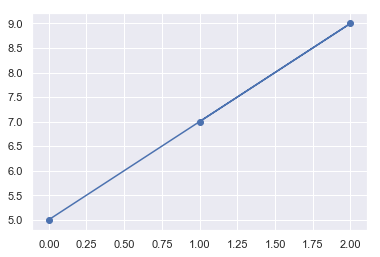

In [7]:
from sklearn.linear_model import LinearRegression   #skearlar liberia gigante e importamos la funcion que queremos

model = LinearRegression()
model.fit(X, y) #importo la clase del modelo que quiero estimar, instancio el modelo

print(model.intercept_)
print(model.coef_)

y_pred = model.predict(X)  #y_pred es mi linea recta de la regresion lineal

plt.scatter(X, y)   #aqui se pasa x y
                    #no aumento la matriz, skelar lo hace por si solo, agrega solo la columna de 1 al inicio
plt.plot(X, y_pred);
#todos los datos centrados, no me interesa estimar el intercepto
#devueleve el intercepto y los coeficientes

### Gradient Descent Regression

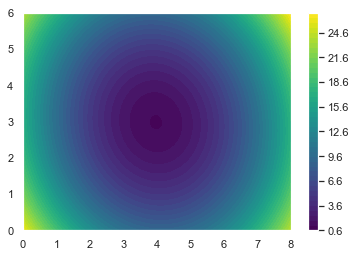

In [8]:
X = np.random.randn(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

m, n = X.shape

theta0 = np.linspace(0, 8, 1000)
theta1 = np.linspace(0, 6, 1000)
Theta0, Theta1 = np.meshgrid(theta0, theta1)

J = (np.array([Theta0  + Theta1 * X[i, 0] - y[i] for i in range(m)]) ** 2).mean(axis=0)

plt.contourf(Theta0, Theta1, J, 50, cmap='viridis')
plt.colorbar()

#morado el valor mas bajo, ahi quiero llegar, 4,3 el valor de original
#tiene solucion exacta por tener forma de vaso.
#metodo: calcular el gradiente de la funcion de costos, que esta abajo, significa hacia donde crece la funcion y entonces
#ghacia donde nos movemos, estamos en el 0.0 y queremos movernos, cuanto nos movemos de acuerdo al parametro alfa
#negativo porque queremos alejarnos del lado donde crece
#depende de la cantidad de paso de pasos que le damos y la distancia que se va moviendo

Gradient:

$$\nabla_{\theta} MSE =\frac{2}{m}X^{T}(X\theta - y)$$

Update Rule:
 
$$\theta^{\ next \ step}:= \theta - \alpha \nabla_{\theta} MSE$$

In [12]:
X = np.random.randn(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Final Parameters: 
 [[4.00889343]
 [3.11899043]]


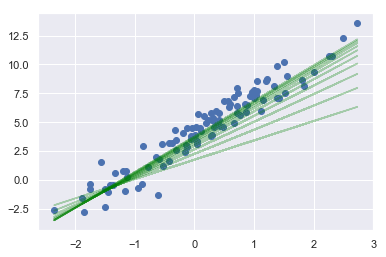

In [36]:
def linear_reg_gd(X, y, learning_rate=0.01, steps=100):
    m, n = X.shape
    
    X_aug = np.concatenate((np.ones((m, 1)), X), axis=1)  #guardar dimensiones de la matriz para aumentarla

    #theta = np.random.randn(2, 1)
    theta = np.array([[1.1],[1.1]])
    
    fig, ax = plt.subplots()
    ax.scatter(X, y)

    for i in range(steps):
        theta -= learning_rate * (2 / m) * X_aug.T @ (X_aug @ theta - y)   #actualizacion del parametro
        y_pred = X_aug @ theta   #me muevo de un conjunto de parametro hacia otro y predigo el valor

        if i // (steps // 10) == 0:
            ax.plot(X_aug[:, 1], y_pred, color='green', alpha=0.3)
    print('Final Parameters: \n {}'.format(theta))
    #grafico de 10 curvas y como nos vamos acercando a la solucion
    #graficamente se ve que nunca se llega a la solucion lineal exacta estimada anteriormente
    


linear_reg_gd(X, y, learning_rate=0.1)
#linear_reg_gd(X, y, learning_rate=0.1, steps = 200)
#avanza mas lento hacia el minimo de la funcion al acercarse
#si step es muy grande no puedo llegarr con la fineza necesaria al valor que quiero llegar

C:\Users\joseo\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\joseo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


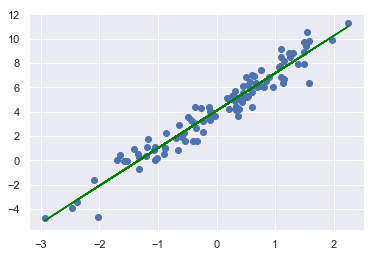

In [14]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(penalty=None, learning_rate='constant', eta0=0.01, max_iter=100, verbose=0)
model.fit(X, y)
y_pred = model.predict(X)

#se puede hacer learning rate valla decreciendo a medida que se va iterando
#eta valor real del learing rate
#verbose con 0 me estima el modelo, sin hacer print de nada, si pongo 1 me imprime todo

plt.scatter(X, y)
plt.plot(X, y_pred, color='green');

## Ridge Regression

Ridge Regression(also called Tikhonov regularization) is a regularized version of Linear Regression: a regularization term is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to evaluate the model’s performance using the unregularized performance measure.

$$min \ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}(\theta^{T}x^{(i)}- y^{(i)})^{2}$$

$subject \ to$

$$\sum_{j=1}^{n}\theta_{j}^{2} \leq t$$

Cost Function:

$$min \ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}(\theta^{T}x^{(i)}- y^{(i)})^{2} + \alpha \sum_{j=1}^{n}\theta_{j}^{2}$$

Closed Form

$$\theta = (X^{T} X + \alpha A)^{-1} X^{T}y$$

$A$: is the $(n \ x \ n)$ identity matrix with a $0$ in the top left corner.

In [15]:
def ridge_reg(X, y, reg=1):
    m, n = X.shape
    
    X_aug = np.concatenate((np.ones((m, 1)), X), axis=1)
    
    A = np.eye(n+1)
    A[0, 0] = 0
    
    theta = np.linalg.inv(X_aug.T @ X_aug + reg * A) @ X_aug.T @ y
    
    y_pred = X_aug @ theta
    
    print('Final Parameters: \n {}'.format(theta))
    
X = np.random.randn(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
    
ridge_reg(X, y, reg=0.01)
#parametros d ela ridge no son los mismo que los de arriba

Final Parameters: 
 [[3.85439134]
 [2.8133391 ]]


In [5]:
from sklearn.linear_model import Ridge #importo la funcion ridge

X = np.random.randn(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

model = Ridge(alpha=0.01, )
#model.fit(X, y)
print(model.intercept_, model.coef_)

[3.8550081] [[3.21466942]]


-- Epoch 1
Norm: 0.25, NNZs: 1, Bias: 0.303201, T: 100, Avg. loss: 10.064834
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.48, NNZs: 1, Bias: 0.583284, T: 200, Avg. loss: 8.638763
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.69, NNZs: 1, Bias: 0.841862, T: 300, Avg. loss: 7.425924
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.88, NNZs: 1, Bias: 1.081685, T: 400, Avg. loss: 6.394498
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.06, NNZs: 1, Bias: 1.304228, T: 500, Avg. loss: 5.517458
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.22, NNZs: 1, Bias: 1.510453, T: 600, Avg. loss: 4.770551
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.37, NNZs: 1, Bias: 1.700644, T: 700, Avg. loss: 4.135100
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.51, NNZs: 1, Bias: 1.876209, T: 800, Avg. loss: 3.594835
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.63, NNZs: 1, Bias: 2.038578, T: 900, Avg. loss: 3.135494
Total training time: 0.00 seconds.


C:\Users\joseo\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\joseo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


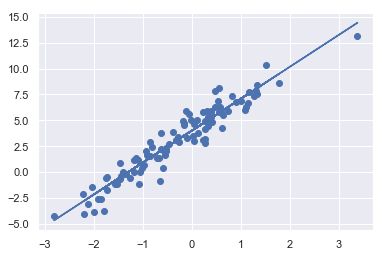

In [17]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(penalty='l2', learning_rate='constant', eta0=0.001, max_iter=100, verbose=1)
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred);

## Lasso Regression

Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso Regression) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm of the weight vector instead of half the square of the ℓ2 norm.

$$min \ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}(\theta^{T}x^{(i)}- y^{(i)})^{2}$$

$subject \ to$

$$\sum_{j=1}^{n}|\theta_{j}| \leq t$$

Cost Function:

$$min \ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}(\theta^{T}x^{(i)}- y^{(i)})^{2} + \alpha \sum_{j=1}^{n}|\theta_{j}|$$

The Lasso cost function is not differentiable at $θ_{i} = 0$ (for i = 1, 2, , n), but Gradient Descent still works fine if you use a subgradient vector g.

Final Parameters: 
 [[1.73657478e-03]
 [3.02324332e+00]]


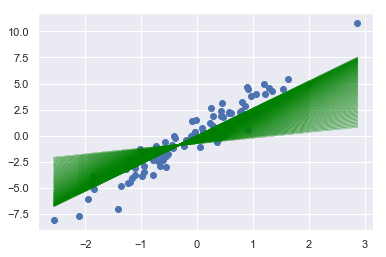

In [20]:
def lasso_reg(X, y, learning_rate=0.01, steps=1000, alfa=1):
    m, n = X.shape
    
    X_aug = np.concatenate((np.ones((m, 1)), X), axis=1)

    theta = np.random.randn(n + 1, 1)

    fig, ax = plt.subplots()
    ax.scatter(X, y)

    for i in range(steps):
        theta -= learning_rate * (2 / m) * X_aug.T @ (X_aug @ theta - y) + alfa * np.sign(theta)
        y_pred = X_aug @ theta

        if i // (steps // 10) == 0:
            ax.plot(X_aug[:, 1], y_pred, color='green', alpha=0.3)
    print('Final Parameters: \n {}'.format(theta))

    
X = np.random.randn(100, 1)
y = 3 * X + np.random.randn(100, 1)
    
lasso_reg(X, y, alfa=0.001, steps=1000)

In [21]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)
model.fit(X, y)
print(model.intercept_, model.coef_)

[0.04898635] [2.97185971]


### Boston Dataset

In [6]:
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

ValueError: x and y must be the same size

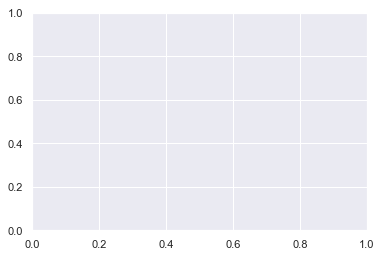

In [9]:
def lasso_reg(X, y, learning_rate=0.01, steps=1000, alfa=1):
    m, n = X.shape
    
    X_aug = np.concatenate((np.ones((m, 1)), X), axis=1)

    theta = np.random.randn(n + 1, 1)

    fig, ax = plt.subplots()
    ax.scatter(X, y)

    for i in range(steps):
        theta -= learning_rate * (2 / m) * X_aug.T @ (X_aug @ theta - y) + alfa * np.sign(theta)
        y_pred = X_aug @ theta

        if i // (steps // 10) == 0:
            ax.plot(X_aug[:, 1], y_pred, color='green', alpha=0.3)
    print('Final Parameters: \n {}'.format(theta))

    
X = pd.DataFrame(boston.data, columns=boston.feature_names) #lista de datos X
y = pd.DataFrame(boston.target, columns=['PRICE'])  #solo una columna
    
lasso_reg(X, y, alfa=0.001, steps=1000)

In [12]:
from sklearn.linear_model import Lasso

X = pd.DataFrame(boston.data, columns=boston.feature_names) #lista de datos X
y = pd.DataFrame(boston.target, columns=['PRICE'])  #solo una columna

model = Lasso(alpha=0.1)
model.fit(X, y)
print(model.intercept_, model.coef_)

[25.57707318] [-0.09789363  0.04921111 -0.03661906  0.95519003 -0.          3.70320175
 -0.01003698 -1.16053834  0.27470721 -0.01457017 -0.77065434  0.01024917
 -0.56876914]


In [1]:
#scater plot de la estimacion real y la predicha, ver como se esta comportando graficamente
y_pred = model.predict(X)
plt.scatter(y,y_pred)

NameError: name 'model' is not defined

In [14]:
from sklearn.metrics import r2_score
R2 = r2_score(y, y_pred) #calcular r2
R2

0.7269834862602695

In [15]:
#estimar con ridge
from sklearn.linear_model import Ridge 

X = pd.DataFrame(boston.data, columns=boston.feature_names) 
y = pd.DataFrame(boston.target, columns=['PRICE']) 

model_ridge = Ridge(alpha=0.01, )
model_ridge.fit(X, y)
print(model_ridge.intercept_, model_ridge.coef_)

[36.37832368] [[-1.07954381e-01  4.64363761e-02  2.00760699e-02  2.68500996e+00
  -1.76521422e+01  3.81076688e+00  5.90352236e-04 -1.47388018e+00
   3.05780592e-01 -1.23436561e-02 -9.51477563e-01  9.31765360e-03
  -5.24884868e-01]]


### Lasso Path

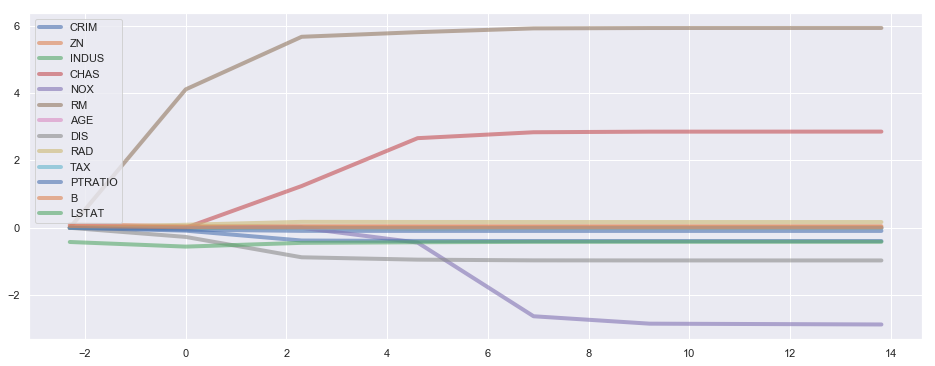

In [19]:
from sklearn.linear_model import lasso_path

X = boston_df.drop('PRICE', axis=1)
y = boston_df['PRICE']

alphas, coefs, _ = lasso_path(X, y, alphas=[0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 10])


plt.figure(figsize=(16, 6))
for i, coef in enumerate(coefs):
    plt.plot(-np.log(alphas), coef, label=X.columns[i], linewidth=4, alpha=0.6)
    
    #como cambian los valores de los parametros a medida que aumento el penalty
    #los que se hacen cero primero son los menos significativos
    
    #el valor de alfa ideal con cross validation
 

plt.legend()
    

## Logistic Regression

Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result .

$$\hat{p} = h_{\theta}(x) = \sigma(\theta^{T}x)$$

where $\sigma(\cdot)$ is the logistic function:

$$\sigma(t) = \frac{1}{1 + e^{-t}}$$

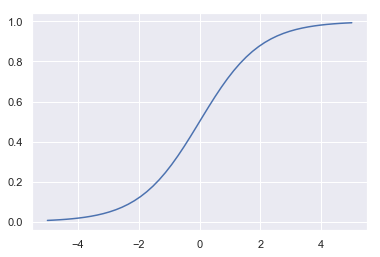

In [5]:
sigm = lambda t: 1 / (1 + np.e ** (-t))
t_range = np.linspace(-5, 5)
plt.plot(t_range, sigm(t_range));

Cost Function:


$$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}[y^{(i)}log(\hat{p}^{(i)}) + (1 - y^{(i)})log(1 - \hat{p}^{(i)})])$$


$$\frac{\partial}{\partial \theta_{j}}J(\theta) = \frac{1}{m}\sum_{i=1}^{m} (\sigma(\theta^{T}x^{(i)}) - y^{(i)})x_{j}^{(i)}$$

In [41]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split  #divido los datos en uno para entrenar y otro testeo

iris = datasets.load_iris()

In [42]:
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['class'] = iris['target']
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
iris_df['class'] == 2


NameError: name 'iris_df' is not defined

In [47]:
X = iris_df.drop('class', axis=1)
y = iris_df['class'] == 2

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)

C:\Users\joseo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [49]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


C:\Users\joseo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
from sklearn.metrics import accuracy_score
print('Train Score', accuracy_score(y_train, y_train_pred))
print('Test Score', accuracy_score(y_test, y_test_pred))